# Phys F303 : Projet numérique

## Onur YAVAS, Jérémy BROISSIN

### I. Introduction générale :

Pour ce projet, nous devons résoudre les exercices proposés dans le Numerical MOOC pour la section concernant la méthode du Monte Carlo. 
Tout d'abord, nous commençons par cette section avec un rappel bref de ce qu'est la méthode de Monte Carlo, ainsi que son utilisation dans ce projet.
Ensuite, pour chaque exercice, nous allons rappeler brièvement ce en quoi ils consistent, les résoudre et donner une petite conclusion. 
Enfin, nous terminerons par une conclusion générale qui reprendra la totalité de ce projet. 

La méthode de Monte Carlo, ou simulation, est d'utiliser une représentation abstraite (ou modèle) d’un système ou d’un problème, ici physique, et d’étudier l’évolution de ce modèle sans faire fonctionner le système réel. Il s'agit d'une méthode d’estimation d’une quantité numérique qui utilise des nombres aléatoires. 
Pour ce projet, nous allons utiliser cette méthode pour étudier un problème mathématique et deux physiques : les Nombres Aléatoires, le Mouvement Brownien et le Modèle d'Ising. 

Avant d'entamer la prochaine section, implémentons les bibliothèques qui nous serons utiles pour les différents codes:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random as rd
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

### II. Les nombres aléatoires

Générer des nombres aléatoires n'est pas une chose aisée. Par ailleurs, en pratique, ces dits nombres ne sont pas réellement aléatoires. Ils proviennent de diverses algorithmes qui créent  des séquences à très longue périodicité. On peut aussi les avoir grâce à des distributions, i.e la probalité d'avoir ces nombres dans un intervalle précis varie en fonction de ce-dernier. 

Le but de cet exercice, dans un premier temps,  est de voir que lorsqu'on tire aléatoirement des nombres, dans un certain intervalle grâce à la fonction random, pour un grand nombre de tirage, la distribution devient uniforme. Cela sera vérifier en normalisant les histogrammes qui en découleront. 
Nous allons voir cela en tirant à la suite 10 nombres, puis 10 000, et enfin 1 000 000; le tout pour un intervalle entre 15 et 30. Remarquons déjà que la fonction random renvoie pour chaque nombre aléatoire, une valeur de 0 ou 1; il faudra donc renormaliser l'intervalle choisie. 

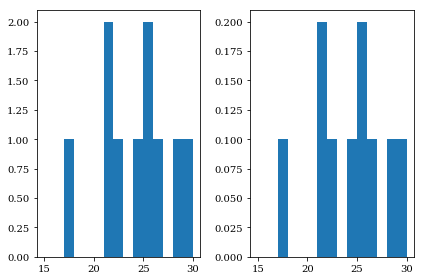

In [8]:
# échantillon de 10

a=15
b=30
x = np.random.random_sample(10)
y = (b-a)*x+a

binwidth=1
plt.figure()

plt.subplot(121)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=False);
plt.subplot(122)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=True);
plt.tight_layout()

On peut voir déjà que pour un petit tirage comme celui-ci, on se trouve très loin du fait qu'on peut avoir une distribution uniforme. Voyons voir pour un tirage 1000 fois plus grand. 

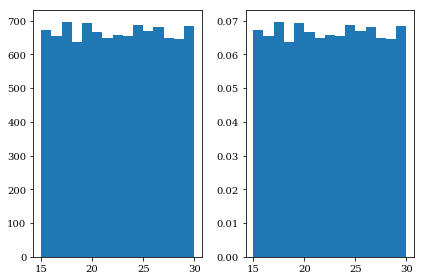

In [7]:
# échantillon de 10 000

a=15
b=30
x = np.random.random_sample(10000)
y = (b-a)*x+a

binwidth=1
plt.figure()

plt.subplot(121)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=False);
plt.subplot(122)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=True);
plt.tight_layout()

Rien qu'en utilisant un facteur 1000 sur le nombre du tirage, on s'approche de la distribution uniforme que l'on cherche. Néanmoins, il faudra utiliser un facteur 100 pour voir qu'il nous faut un très grand nombre de tirage pour obtenir cette distribution. 

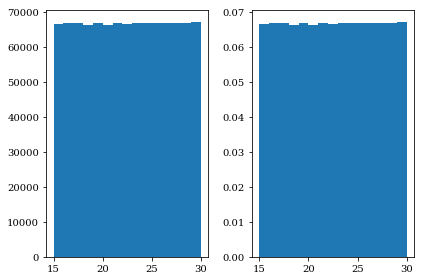

In [9]:
# échantillon de 1 000 000

a=15
b=30
x = np.random.random_sample(1000000)
y = (b-a)*x+a

binwidth=1
plt.figure()

plt.subplot(121)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=False);
plt.subplot(122)
plt.hist(y,bins=np.arange(15.,31., binwidth),density=True);
plt.tight_layout()

Avec cette dernière implémentation, on sait qu'on doit tourner autour d'un nombre de tirage propotionnel à $10^6$ afin d'obtenir des nombres aléatoires de manière uniforme.

Concentrons-nous maintenant sur le premier exercice de cette partie ; dans le Numerical MOOC, les distributions gausiennes et exponentielles ont été implémenté grâce à la méthode de réjection de Von Neuman. Mais il se trouve dans les bibliothèques de python, il existe déjà des fonctions qui sont supposés donner les mêmes résultats. Nous allons vérifier cela.

Remarquons qu'ici, nous allons utiliser un tirage de $10^4$ nombres pour chacune des fonctions.

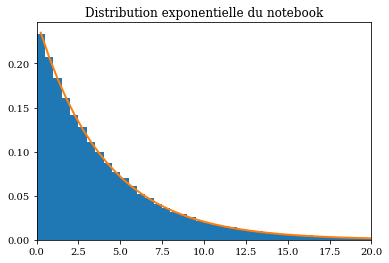

In [16]:
alpha = 0.25 # Taux de croissance de la distribution exponentielle
x = np.random.random_sample(100000)
y = -1/alpha*np.log(1-x)

# Implémentation de l'histogramme
binwidth=0.5
plt.xlim(0,20)
bins=np.arange(0.,21., binwidth)
plt.hist(y,bins,density=True);
plt.title("Distribution exponentielle du notebook")

# Implémentation des centres des bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,alpha*np.exp(-alpha*xc), lw=2)

La biblithèque de Python contient la fonction "random.expovariate()" qui prend comme paramètre $\alpha$ et qui renvoie un nombre de 0 à l'infini. Notons que pour une bonne comparaison, nous avons pris $\alpha = 0.25$ dans les deux cas.

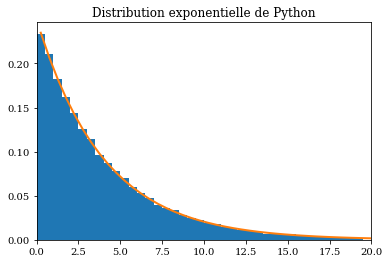

In [15]:
y = [rd.expovariate(0.25) for i in range(100000)]

# Implémentation de l'histogramme
binwidth=0.5
plt.xlim(0,20)
plt.hist(y,bins=np.arange(0.,20., binwidth),density=True);
plt.title("Distribution exponentielle de Python")

# Implémentation des centres des bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,alpha*np.exp(-alpha*xc), lw=2)

En utilisant le même ajustement que sur la distribution précédente. On voit que les deux distributions concordent, ainsi celle de Python nous donne le résultat attendu. 

Le but maintenant est de voir si on obtient la même chose avec la distribution gaussienne. Nous allons reprendre exactement les mêmes étapes, en prenant garde à convertir les paramètres pour l'utilisation de la gaussienne. 
Remarquons, une nouvelle fois encore, qu'ici on utilise un tirage proportionnel à $10^5$.

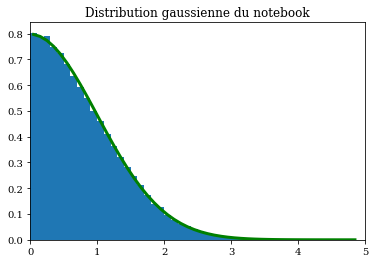

In [18]:
# Nombre de tirage de nombres aléatoires
N = 100000
K = 1.4

# Liste vide pour mettre les nombres finaux
h=[]

for i in range(N):
    u1 = np.random.random_sample()
    
    # Distribution de g selon la distribution gaussienne
    g = np.log(1/(1-u1))
    
    # Génération d'un second nombre pour la condition d'acceptation/de rejet
    u2 = np.random.random_sample()
    
    # Le pas de la condition d'acceptation/de rejet
    ratio = 2*np.exp(-g**2/2.0)/np.sqrt(2*np.pi) / \
                (K*np.exp(-g))
    if (u2<ratio):
        # On remplit la list h par les nombres g obtenus
        h.append(g)

# Implémentation de l'histogramme
binwidth=0.1
plt.xlim(0,5)
bins=np.arange(0.,5., binwidth)
plt.hist(h,bins=np.arange(0.,5.1, binwidth),density=True);
plt.title("Distribution gaussienne du notebook")

# Implémentation des centres des bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

Ici, la biliothèque de Python contient la fonction "random.gauss()" prenant comme paramètre $\mu$ et $\sigma$ et qui renvoie un  nombre réel. Afin d'avoir une meilleure comparaison nos résultats, nous ne prendrons que les résultats positifs.

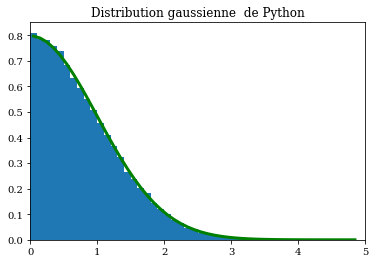

In [20]:
y = [rd.gauss(0,1) for i in range(100000)]

# Implémentation de l'histogramme
binwidth=0.1
plt.xlim(0,5)
plt.hist(y,bins=np.arange(0.,5., binwidth),density=True)
plt.title("Distribution gaussienne  de Python")

# Compute centers of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')

De nouveau, avec le même ajustement, nous percevons que les deux méthodes concordent. 


Avec cet exercice, nous avons su démontrer que l'implémentation des fonctions de la biliothèque de Python suivaient la logique de la méthode de Von Neuman. Néanmoins, si on s'intéresse aux détails, on perçoit que ces implémentations ont quelques irrégularités avec la méthode de rejet. Cela est naturelle car la méthode demande plusieurs étapes précisées tandis que les fonctions de python font tout d'un seul trait. 

Une autre méthode pour générer des nombres aléatoires selon une distribution gaussienne est la méthode de $Box-Muller$ qui prend deux distributions uniformes indépendantes et qui renvoie deux distributions gaussiennes normales. Pour ce second exercie de cette partie, on doit simplement vérifier que cette méthode fonctionne comme les deux méthodes précédentes.

La méthode de Box-Muller transforme des coordonnées polaires uniformément distribuées en des coordonnées cartésiennes normalement distribuées.

Implémentons cette méthode et regardons direcement les résultats:

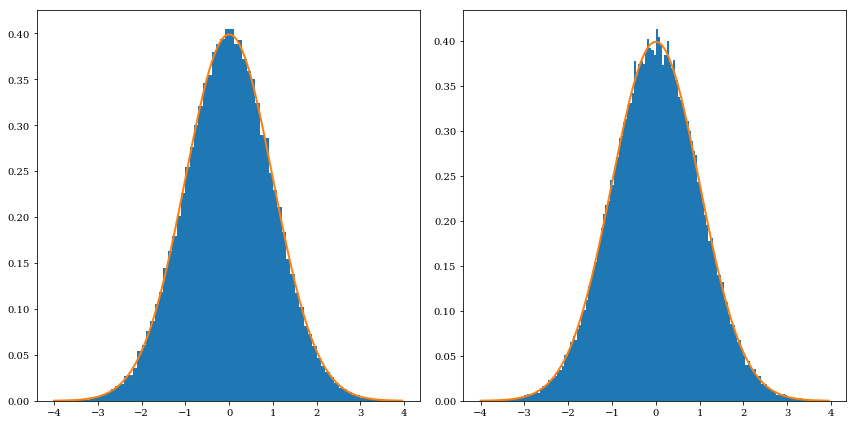

In [23]:
# Deux distributions uniformes indépendantes de 100.000 tirages chacunes
U1 = np.random.random_sample(100000)
U2 = np.random.random_sample(100000)

# Obtention des Gaussiennes normales par Box-Muller
Z1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
Z2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)

#Plots et fits

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(Z1,bins=np.arange(-4.,4., binwidth),density=True)
binwidth=0.05
x=np.arange(-4.,4., binwidth)
plt.plot(x,(1/(np.sqrt(2*np.pi)))*np.exp((-1/2)*x**2),lw=2)

plt.subplot(122)
plt.hist(Z2,bins=np.arange(-4.,4., binwidth),density=True)
plt.tight_layout()
binwidth=0.05
x=np.arange(-4.,4., binwidth)
plt.plot(x,(1/(np.sqrt(2*np.pi)))*np.exp((-1/2)*x**2),lw=2)

Nous obtenons bien deux nouvelles distributions gaussiennes en partant de deux distributions uniformes indépendantes.

Après avoir vérifié que la fonction "random" générait des nombres aléatoires suivant une distribution uniforme après un tirage d'un nombre proportionnel à $10^6$, nous avons implémenté les distributions exponentielle et gaussienne comme proposées dans le notebook du MOOC ainsi qu'avec les fonctions préconçues dans la biliothèque de Python. Nous avons finalement généré une distribution gaussienne normale en partant de deux distributions uniformes à l'aide de la méthode Box-Muller.

### III. Le mouvement Brownien

